In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Update the font of the plots
plt.rcParams.update({'font.size': 22})

# Parameter search: heatmaps

The parameters that lead to the best performance of the model are determined by a random grid search. This grid search is run on the HPC. The files are loaded into .csv format such that the heatmaps can be visualised in this jupyter notebook.

The parameters that need to be determined are:
- No plasticity: alpha and target values
- Plasticity: window size and learning rate
- Delay: alpha, target and dtv values
- Delay with plasticity: window size and learning rate

All parameters are calculated on the updated Memory Task (recollecting a past value from a uniform distribution between -1.0 and 1.0).

The metric is the overall memory capacity ($\sum MC_{\tau}$)

## Creating the parameter set

The parameter set is a random draw out of the distributions of the necessary parameters. These are run on a number of training-test data sets that differ from the final test set.

In [2]:
# Number of samples per training-test data set
n = 250

# Define the parameter ranges
alpha_range = (0.1, 2.0)
target_range = (-1.0, 1.0)
window_range = (1, 50)
lr_range = (1e-6, 1e-1)
dtv_range = (2.0, 20.0)
# dtv_vals = [180.0, 100.0, 60.0, 50.0, 40.0, 30.0, 20.0, 25.0, 22.0]

# Generate the random samples: multiple options
alphas = np.random.uniform(*alpha_range, n)
targets = np.random.uniform(*target_range, n)
windows = np.random.uniform(*window_range, n)
lrs = np.power(10, np.random.uniform(np.log10(lr_range[0]), np.log10(lr_range[1]), n))
dtvs = np.random.uniform(*dtv_range, n)
# dtvs = np.random.choice(dtv_vals, size=n, replace=True)

# Ones you have determined the parameters they can be fixed
alphas = np.ones(n) * 0.95
targets = np.ones(n) * 0.0
dtvs = np.ones(n) * 6.0

# Build a dataframe out of these values
df = pd.DataFrame({'alpha': alphas, 'target': targets, 'window': windows, 'lr': lrs, 'dtv': dtvs})
# df = pd.DataFrame({'window': windows, 'lr': lrs})
# df = pd.DataFrame({'alpha': alphas, 'dtv': dtvs})
# df = pd.DataFrame({'alpha': alphas, 'target': targets})
# df = pd.DataFrame({'target': targets, 'dtv': dtvs})

df.to_csv("params/param_samples_10.csv", index=False)

## Reading the results

The memory capacity for each set of parameters is calculated on the HPC. The code to run this can be found in "parameter_search.py".

In [3]:
df1 = pd.read_csv('params/param_samples_3_results.csv')
df2 = pd.read_csv('params/param_samples_4_results.csv')
df3 = pd.read_csv('params/param_samples_5_results.csv')
df4 = pd.read_csv('params/param_samples_1_results.csv')
df5 = pd.read_csv('params/param_samples_2_results.csv')
df6 = pd.read_csv('params/param_samples_6_results.csv')
df7 = pd.read_csv('params/param_samples_7_results.csv')
df8 = pd.read_csv('params/param_samples_8_results.csv')
df9 = pd.read_csv('params/param_samples_9_results.csv')
df10 = pd.read_csv('params/param_samples_10_results.csv')
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index=True)

In [4]:
df = df.iloc[:, 1:]

# write this to a new file
# df.to_csv("params/sample_dp_subctx_SM_165.csv")

## Visualise the heatmaps

### No plasticity

These experiments were run on the consensus matrix developed by Suárez et al. (2024) based on the data of Griffa et al.

In [5]:
# Changing input and output nodes

# Input: thalamic, subctx, DA, VA, LIM, DMN
# Output: VIS, SM

df = pd.read_csv("params/sample_thalamic_np_VIS.csv") # thalamic - VIS
df = pd.read_csv("params/sample_subctx_np_VIS.csv") # subctx - VIS
df = pd.read_csv("params/sample_DA_np_VIS.csv") # DA - VIS
df = pd.read_csv("params/sample_VA_np_VIS.csv") # VA - VIS
df = pd.read_csv("params/sample_LIM_np_VIS.csv") # LIM - VIS
df = pd.read_csv("params/sample_DMN_np_VIS.csv") # DMN - VIS

df = pd.read_csv("params/sample_thalamic_np_SM.csv") # thalamic - SM
df = pd.read_csv("params/sample_subctx_np_SM.csv") # subctx - SM
df = pd.read_csv("params/sample_DA_np_SM.csv") # DA - SM
df = pd.read_csv("params/sample_VA_np_SM.csv") # VA - SM
df = pd.read_csv("params/sample_LIM_np_SM.csv") # LIM - SM
df = pd.read_csv("params/sample_DMN_np_SM.csv") # DMN - SM

The same experiment was repeated for the 165-node matrix.

In [6]:
df = pd.read_csv("params/sample_thalamic_np_VIS_165.csv") # thalamic - VIS
df = pd.read_csv("params/sample_subctx_SM_165.csv") # subctx - SM

These results can be visualised in a heatmap.

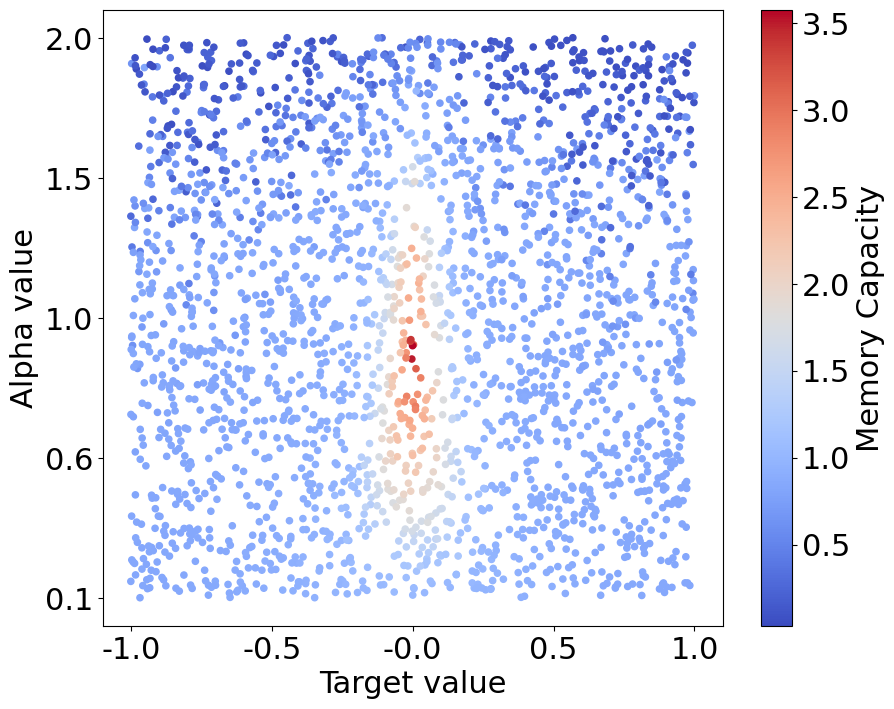

In [7]:
plt.figure(figsize=(10, 8))
sc = plt.scatter(df['target'], df['alpha'], c=df['MC'], cmap="coolwarm", s=20)

cbar = plt.colorbar(sc)
cbar.set_label("Memory Capacity")

# Limit the number of ticks on the axes
x_ticks = np.linspace(df['target'].min(), df['target'].max(), 5)
plt.xticks(x_ticks, [f"{val:.1f}" for val in x_ticks]) 

y_ticks = np.linspace(df['alpha'].min(), df['alpha'].max(), 5)
plt.yticks(y_ticks, [f"{val:.1f}" for val in y_ticks])

plt.xlabel('Target value')
plt.ylabel('Alpha value')

plt.show()

### Plasticity

Load data from consensus connectome.

In [8]:
df = pd.read_csv("params/sample_thalamic_p_VIS_alpha12_target00.csv") # thalamic - VIS ; alpha = 1.2 ; target = 0.0
df = pd.read_csv("params/sample_subctx_p_VIS_alpha15_target00.csv") # subctx - VIS ; alpha = 1.5 ; target = 0.0
df = pd.read_csv("params/sample_DA_p_VIS_alpha20_target00.csv") # DA - VIS ; alpha = 2.0 ; target = 0.0
df = pd.read_csv("params/sample_VA_p_VIS_alpha19_target00.csv") # VA - VIS ; alpha = 1.9 ; target = 0.0
df = pd.read_csv("params/sample_DMN_p_VIS_alpha19_target00.csv") # DMN - VIS ; alpha = 1.9 ; target = 0.0
df = pd.read_csv("params/sample_LIM_p_VIS_alpha19_target00.csv") # LIM - VIS ; alpha = 1.9 ; target = 0.0

df = pd.read_csv("params/sample_thalamic_p_SM_alpha09_target00.csv") # thalamic - SM ; alpha = 0.9 ; target = 0.0
df = pd.read_csv("params/sample_subctx_p_SM_alpha09_target00.csv") # subctx - SM ; alpha = 0.9 ; target = 0.0
df = pd.read_csv("params/sample_DA_p_SM_alpha095_target00.csv") # DA - SM ; alpha = 0.95 ; target = 0.0
df = pd.read_csv("params/sample_VA_p_SM_alpha095_target00.csv") # VA - SM ; alpha = 0.95 ; target = 0.0
df = pd.read_csv("params/sample_DMN_p_SM_alpha095_target00.csv") # DMN - SM ; alpha = 0.95 ; target = 0.0
df = pd.read_csv("params/sample_LIM_p_SM_alpha095_target00.csv") # LIM - SM ; alpha = 0.95 ; target = 0.0

Load data from the 165-node connectome.

In [9]:
df = pd.read_csv("params/sample_thalamic_p_VIS_165.csv")
df = pd.read_csv("params/sample_p_subctx_SM_165.csv")

Visualise in a heatmap.

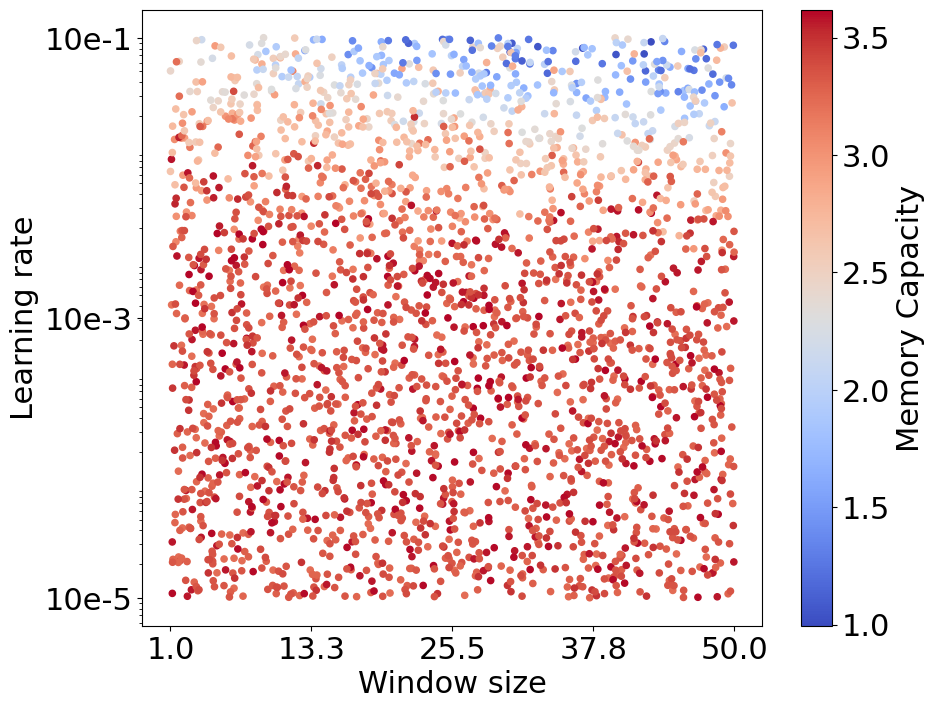

In [10]:
plt.figure(figsize=(10, 8))
sc = plt.scatter(df['window'], df['lr'], c=df['MC'], cmap="coolwarm", s=20)

cbar = plt.colorbar(sc)
cbar.set_label("Memory Capacity")

# Limit the number of ticks on the axes
x_ticks = np.linspace(df['window'].min(), df['window'].max(), 5)
plt.xticks(x_ticks, [f"{val:.1f}" for val in x_ticks]) 

plt.yscale('log')

def scientific_notation(x, pos):
    return f"10e{int(np.log10(x))}"

plt.yticks(np.logspace(np.log10(df['lr'].min()), np.log10(df['lr'].max()), 3), 
           [scientific_notation(val, None) for val in np.logspace(np.log10(df['lr'].min()), np.log10(df['lr'].max()), 3)])

plt.xlabel("Window size")
plt.ylabel("Learning rate")

plt.show()

### Delay without plasticity

Load the data for the consensus matrix.

In [11]:
df = pd.read_csv("params/sample_thalamic_d_VIS_alphas.csv") # thalamic - VIS ; target = 0.0
df = pd.read_csv("params/sample_thalamic_d_VIS_targets.csv") # thalamic - VIS ; alpha = 1.2

df = pd.read_csv("params/sample_subctx_d_VIS.csv") # subctx - VIS
df = pd.read_csv("params/sample_DA_d_VIS.csv") # DA - VIS
df = pd.read_csv("params/sample_VA_d_VIS.csv") # VA - VIS
df = pd.read_csv("params/sample_DMN_d_VIS.csv") # DMN - VIS
df = pd.read_csv("params/sample_LIM_d_VIS.csv") # LIM - VIS

df = pd.read_csv("params/sample_thalamic_d_SM.csv") # thalamic - SM
df = pd.read_csv("params/sample_subctx_d_SM.csv") # subctx - SM
df = pd.read_csv("params/sample_DA_d_SM.csv") # DA - SM
df = pd.read_csv("params/sample_VA_d_SM.csv") # VA - SM
df = pd.read_csv("params/sample_DMN_d_SM.csv") # DMN - SM
df = pd.read_csv("params/sample_LIM_d_SM.csv") # LIM - SM

Load the data for the 165-node matrix.

In [12]:
df = pd.read_csv("params/sample_thalamic_d_VIS_targets_165.csv")
df = pd.read_csv("params/sample_d_subctx_SM_165.csv")

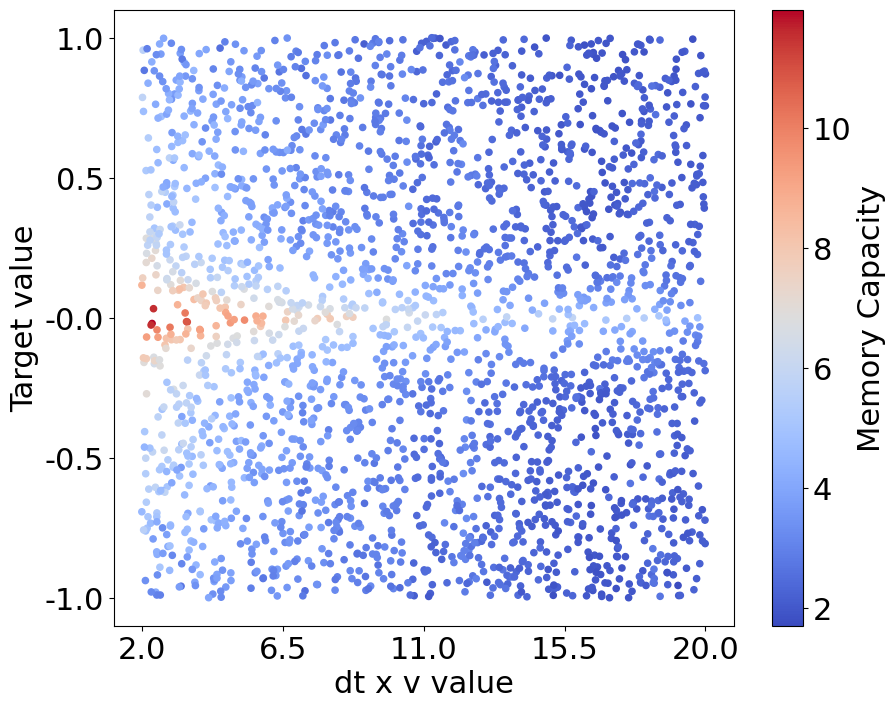

In [13]:
# The "MC" can be replaced by "memory_MB" or "duration"
plt.figure(figsize=(10, 8))
sc = plt.scatter(df['dtv'], df['target'], c=df['MC'], cmap="coolwarm", s=20)

cbar = plt.colorbar(sc)
cbar.set_label("Memory Capacity")

x_ticks = np.linspace(df['dtv'].min(), df['dtv'].max(), 5)
plt.xticks(x_ticks, [f"{val:.1f}" for val in x_ticks])

y_ticks = np.linspace(df['target'].min(), df['target'].max(), 5)
plt.yticks(y_ticks, [f"{val:.1f}" for val in y_ticks])

plt.xlabel("dt x v value")
plt.ylabel("Target value")

plt.show()

### Delay with plasticity

Load data from consensus connectome.

In [14]:
df = pd.read_csv("params/sample_thalamic_dp_VIS.csv") # thalamic - VIS
df = pd.read_csv("params/sample_LIM_dp_SM.csv") # LIM - SM
df = pd.read_csv("params/sample_thalamic_dp_SM.csv") # thalamic - SM
df = pd.read_csv("params/sample_DA_dp_VIS.csv") # DA - VIS
df = pd.read_csv("params/sample_DA_dp_SM.csv") # DA - SM
df = pd.read_csv("params/sample_DMN_dp_SM.csv") # DMN - SM
df = pd.read_csv("params/sample_DMN_dp_VIS.csv") # DMN - VIS
df = pd.read_csv("params/sample_LIM_dp_SM.csv") # LIM - SM
df = pd.read_csv("params/sample_LIM_dp_VIS.csv") # LIM - VIS
df = pd.read_csv("params/sample_VA_dp_SM.csv") # VA - SM
df = pd.read_csv("params/sample_VA_dp_VIS.csv") # VA - VIS
df = pd.read_csv("params/sample_subctx_dp_SM.csv") # subctx - SM
df = pd.read_csv("params/sample_subctx_dp_VIS.csv") # subctx - VIS

Load data from 165-node connectome.

In [15]:
df = pd.read_csv("params/sample_thalamic_dp_VIS_165.csv") # thalamic - VIS
df = pd.read_csv("params/sample_dp_subctx_SM_165.csv") # subctx - SM

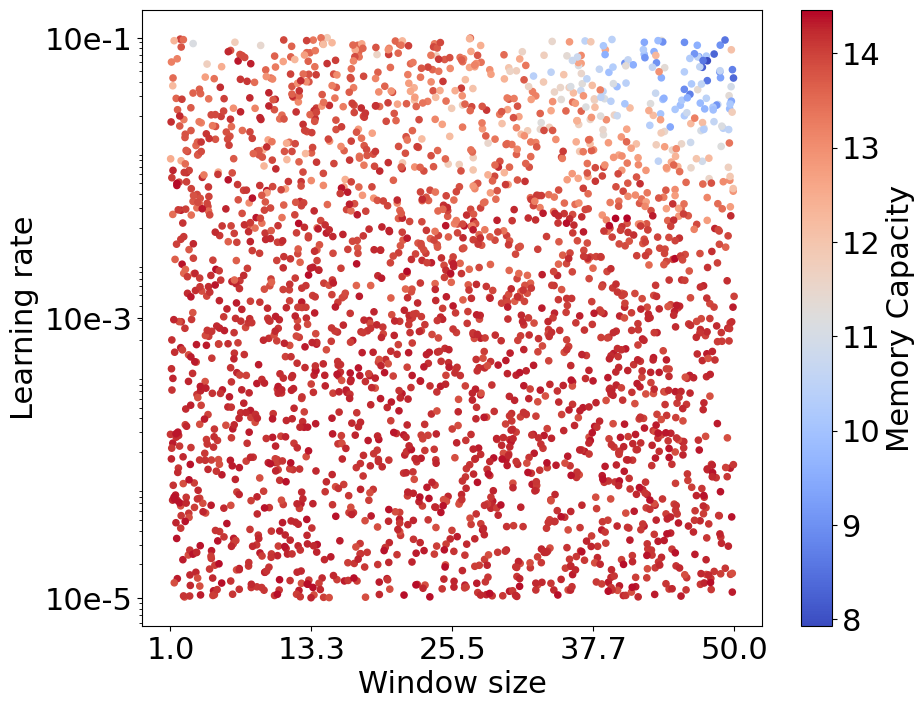

In [16]:
# The "MC" can be replaced by "memory_MB" or "duration"
plt.figure(figsize=(10, 8))
sc = plt.scatter(df['window'], df['lr'], c=df['MC_test'], cmap="coolwarm", s=20)

cbar = plt.colorbar(sc)
cbar.set_label("Memory Capacity")

# Limit the number of ticks on the axes
x_ticks = np.linspace(df['window'].min(), df['window'].max(), 5)
plt.xticks(x_ticks, [f"{val:.1f}" for val in x_ticks]) 

plt.yscale('log')

def scientific_notation(x, pos):
    return f"10e{int(np.log10(x))}"

plt.yticks(np.logspace(np.log10(df['lr'].min()), np.log10(df['lr'].max()), 3), 
           [scientific_notation(val, None) for val in np.logspace(np.log10(df['lr'].min()), np.log10(df['lr'].max()), 3)])

plt.xlabel("Window size")
plt.ylabel("Learning rate")

plt.show()

## References

[1] Falandays, J.B., Yoshimi, J., Warren, W.H. et al. A potential mechanism for Gibsonian resonance: behavioral entrainment emerges from local homeostasis in an unsupervised reservoir network. Cogn Neurodyn 18, 1811–1834 (2024). https://doi.org/10.1007/s11571-023-09988-2

[2] Iacob S, Dambre J. Exploiting Signal Propagation Delays to Match Task Memory Requirements in Reservoir Computing. Biomimetics (Basel). 2024 Jun 14;9(6):355. doi: 10.3390/biomimetics9060355. PMID: 38921237; PMCID: PMC11201534.

[3] Suárez, L.E., Mihalik, A., Milisav, F. et al. Connectome-based reservoir computing with the conn2res toolbox. Nat Commun 15, 656 (2024). https://doi.org/10.1038/s41467-024-44900-4

[4] Hellyer PJ, Scott G, Shanahan M, Sharp DJ, Leech R. Cognitive Flexibility through Metastable Neural Dynamics Is Disrupted by Damage to the Structural Connectome. J Neurosci. 2015 Jun 17;35(24):9050-63. doi: 10.1523/JNEUROSCI.4648-14.2015. PMID: 26085630; PMCID: PMC4469735.